# Deteksi Pembangkit Listrik Tenaga Surya Menggunakan ANN

   Tenaga surya adalah alternatif gratis dan bersih untuk bahan bakar fosil tradisional. Namun, saat ini, efisiensi sel surya tidak setinggi yang kita inginkan, sehingga memilih kondisi ideal untuk pemasangannya sangat penting untuk mendapatkan jumlah energi maksimum darinya. Jadi kami ingin memprediksi keluaran daya untuk rangkaian generator tenaga surya tertentu, dengan mengetahui beberapa kondisi lingkungan.
   
   Peramalan tenaga surya sangat berguna dalam kelancaran operasi dan pengendalian pembangkit listrik tenaga surya. Pembangkitan energi oleh panel surya atau sel tergantung pada tingkat doping dan desain susunan PV surya tetapi faktor utamanya adalah jumlah radiasi matahari yang jatuh pada panel, faktor lingkungan seperti suhu dan kelembaban atmosfer dan debu yang ada di panel. Faktor-faktor ini secara alami bervariasi dan karenanya output sel surya secara langsung tergantung padanya. Juga, radiasi matahari serta semua faktor yang disebutkan di atas bervariasi sepanjang hari. Rata-rata per jam atau rata-rata pada interval waktu tertentu dari parameter yang diterima ini diukur untuk prediksi keluaran modul PV yang lebih baik dan dengan demikian pembangkit listrik tenaga surya. Semakin rendah sampling rate yang lebih baik akan menjadi predikat.

   Pada kasus ini menggunakan pendekatan AI dengan metode Artificial Neural Network bertujuan memberikan peramalan untuk variabel generasi tenaga angin dan matahari ketika data historisnya tersedia. ANN dianggap sebagai kotak hitam karena tidak memberikan pemahaman kualitatif yang memadai tentang hubungan antara variabel masukan dan keluaran. Sehingga model peramalan berbasis ANN yang diterapkan untuk meramalkan radiasi matahari dan energi yang ditemukan.

# Importing libraries

In [5]:
import pandas as pd
import numpy as np
import tensorflow as tf
from keras.layers import Dense, Activation, BatchNormalization, Dropout
from keras import regularizers
from keras.optimizers import RMSprop, Adam, SGD
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

# Importing dataset

Langkah pertama adalah menyiapkan kumpulan data, yang merupakan sumber informasi untuk kasus yang diambil.
File solarpowergeneration.csv berisi data untuk kasus ini. Di sini jumlah variabel (kolom) adalah 21, dan jumlah instance (baris) adalah 2920.

In [6]:
dts = pd.read_csv('solarpowergeneration.csv')
dts.head(10)

,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,...,wind_direction_10_m_above_gnd,wind_speed_80_m_above_gnd,wind_direction_80_m_above_gnd,wind_speed_900_mb,wind_direction_900_mb,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth,generated_power_kw
0,2.17,31,1035.0,0.0,0.0,0.0,0,0,0,0.00,...,312.71,9.36,22.62,6.62,337.62,24.48,58.753108,83.237322,128.33543,454.100950
1,2.31,27,1035.1,0.0,0.0,0.0,0,0,0,1.78,...,294.78,5.99,32.74,4.61,321.34,21.96,45.408585,75.143041,139.65530,1411.999400
2,3.65,33,1035.4,0.0,0.0,0.0,0,0,0,108.58,...,270.00,3.89,56.31,3.76,286.70,14.04,32.848282,68.820648,152.53769,2214.849300
3,5.82,30,1035.4,0.0,0.0,0.0,0,0,0,258.10,...,323.13,3.55,23.96,3.08,339.44,19.80,22.699288,64.883536,166.90159,2527.609200
4,7.73,27,1034.4,0.0,0.0,0.0,0,0,0,375.58,...,10.01,6.76,25.20,6.62,22.38,16.56,19.199908,63.795208,182.13526,2640.203400
5,8.69,29,1034.6,0.0,0.0,0.0,0,0,0,449.45,...,23.63,7.10,30.47,6.92,27.90,17.28,25.088167,65.700860,197.22062,2546.081600
6,9.72,27,1034.0,0.0,0.0,0.0,0,0,0,469.92,...,25.02,6.61,29.36,6.44,26.57,12.96,36.197514,70.351498,211.21422,2270.320700
7,10.07,28,1034.1,0.0,0.0,0.0,0,0,0,436.99,...,14.74,7.63,19.29,7.52,16.70,10.80,49.073008,77.228779,223.65641,1063.830200
8,9.38,32,1033.9,0.0,0.0,0.0,0,0,0,353.33,...,6.58,10.50,5.91,10.14,6.12,11.52,62.371140,85.585411,234.50308,86.817611
9,6.54,47,1035.1,0.0,0.0,0.0,0,0,0,228.73,...,360.00,12.25,1.68,11.53,1.79,12.24,105.866560,121.463180,216.06756,9.666667


In [7]:
X = dts.iloc[:, :-1].values
y = dts.iloc[:, -1].values
print(X.shape, y.shape)
y = np.reshape(y, (-1,1))
y.shape

(4213, 20) (4213,)


(4213, 1)

In [8]:
X

array([[   2.17    ,   31.      , 1035.      , ...,   58.753108,
          83.237322,  128.33543 ],
       [   2.31    ,   27.      , 1035.1     , ...,   45.408585,
          75.143041,  139.6553  ],
       [   3.65    ,   33.      , 1035.4     , ...,   32.848282,
          68.820648,  152.53769 ],
       ...,
       [   7.27    ,   90.      , 1026.3     , ...,   25.249506,
          65.827032,  197.33868 ],
       [   8.25    ,   81.      , 1025.5     , ...,   36.361161,
          70.496313,  211.30027 ],
       [   8.      ,   80.      , 1025.3     , ...,   48.452849,
          76.919574,  223.04931 ]])

In [9]:
y

array([[ 454.10095 ],
       [1411.9994  ],
       [2214.8493  ],
       ...,
       [ 158.36778 ],
       [ 126.95306 ],
       [  20.055031]])

# Membuat Neural Network

Langkah selanjutnya adalah membangun jaringan syaraf tiruan dengan mendefinisikan fungsi akurasi. Untuk masalah aproksimasi, biasanya disusun oleh:

• Scaling layer berisi statistik input. 

• Perceptron layers.

• Unscaling layer berisi statistik output.

Neural network pada kasus ini memiliki 19 input (suhu 2m di atas gnd, kelembaban relatif 2m di atas gnd, tekanan permukaan laut rata-rata MSL, curah hujan total sfc, jumlah hujan salju sfc, total tutupan awan sfc, tutupan awan tinggi, tutupan awan sedang, tutupan awan rendah, radiasi gelombang pendek ke belakang sfc, arah angin 10m di atas gnd, kecepatan angin 80m di atas gnd, arah angin 80m di atas gnd, kecepatan angin 900mb, arah angin 900mb, hembusan angin 10m di atas gnd, sudut datang, zenith dan azimuth) dan 1 output (daya yang dihasilkan kw).

# Pemisahan Set Training and Testing 

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print("Train Shape: {} {} \nTest Shape: {} {}".format(X_train.shape, y_train.shape, X_test.shape, y_test.shape))

Train Shape: (3159, 20) (3159, 1) 
Test Shape: (1054, 20) (1054, 1)


# Scaling Fitur

In [11]:
from sklearn.preprocessing import StandardScaler
# input scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# output scaling
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)    
y_test = sc_y.transform(y_test)

In [12]:
X_train

array([[-0.15688663, -0.65066193,  0.32458773, ..., -1.17016507,
         0.20906612,  0.23973116],
       [-0.96299273,  1.26236489, -0.09488224, ...,  0.21285162,
         1.10270022, -0.59126299],
       [-0.01104135, -0.22554486, -1.44007902, ..., -0.78166945,
        -1.98808451, -0.32872643],
       ...,
       [ 0.08053592, -0.39559169, -0.65899702, ..., -1.39867408,
        -1.07235309, -0.0910784 ],
       [ 0.34283131, -0.90573217,  0.59941288, ..., -0.46582577,
         0.41541699,  0.76311909],
       [-0.6893915 ,  0.62468928,  1.45281728, ...,  0.28508139,
         0.20437129, -0.90996355]])

In [13]:
X_test

array([[ 0.34735364, -1.37336095,  0.58494839, ..., -0.78124559,
        -0.35197112,  0.78338018],
       [-1.93190285,  1.68748196, -0.84703527, ...,  0.34119265,
         1.11388012, -0.66875224],
       [-0.95055631,  0.28459563,  0.97548939, ...,  0.32973403,
        -0.38653881, -1.09819031],
       ...,
       [ 0.69783455, -1.37336095,  1.09120525, ..., -0.47407508,
         0.36095606,  0.77638555],
       [-0.00991077, -1.6709429 ,  1.93014517, ..., -1.21521633,
         0.12748879,  0.27526625],
       [-0.58537781,  1.00729465, -1.0640025 , ...,  0.07094803,
         0.619908  , -0.66549089]])

In [14]:
y_train

array([[ 0.37304328],
       [-0.96068338],
       [ 0.56242648],
       ...,
       [ 1.74385844],
       [-0.58299753],
       [-0.14116491]])

# Layer Neural Network 

In [15]:
def create_spfnet(n_layers, n_activation, kernels):
  model = tf.keras.models.Sequential()
  for i, nodes in enumerate(n_layers):
    if i==0:
      model.add(Dense(nodes, kernel_initializer=kernels, activation=n_activation, input_dim=X_train.shape[1]))
      #model.add(Dropout(0.3))
    else:
      model.add(Dense(nodes, activation=n_activation, kernel_initializer=kernels))
      #model.add(Dropout(0.3))
  
  model.add(Dense(1))
  model.compile(loss='mse', 
                optimizer='adam',
                metrics=[tf.keras.metrics.RootMeanSquaredError()])
  return model

In [16]:
spfnet = create_spfnet([32, 64], 'relu', 'normal')
spfnet.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                672       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 2,849
Trainable params: 2,849
Non-trainable params: 0
_________________________________________________________________


# Training
Langkah selanjutnya adalah memilih strategi training yang tepat. Ini terdiri dari dua parameter:

• Indeks kerugian. 

    Indeks kerugian menentukan apa yang akan dipelajari oleh jaringan saraf. Ini terdiri dari istilah kesalahan dan istilah regularisasi.

• Algoritma optimasi.

    Algoritma optimasi bertugas mencari parameter jaringan saraf yang meminimalkan indeks kerugian. Disini kami memilih metode quasi-Newton sebagai algoritma optimasi.

Istilah kesalahan yang dipilih adalah normalized squared error. Ini membagi squared error antara output dari neural network dan target dalam kumpulan data dengan koefisien normalisasinya. Jika normalized squared error memiliki nilai 1, maka neural network memprediksi data 'dalam mean', sedangkan nilai nol berarti prediksi data yang sempurna. Istilah kesalahan ini tidak memiliki parameter untuk disetel.

In [17]:
from keras.utils.vis_utils import plot_model
plot_model(spfnet, to_file='spfnet_model.png', show_shapes=True, show_layer_names=True)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [18]:
hist = spfnet.fit(X_train, y_train, batch_size=32, validation_data=(X_test, y_test),epochs=150, verbose=2)

Epoch 1/150
99/99 - 1s - loss: 0.4925 - root_mean_squared_error: 0.7018 - val_loss: 0.2761 - val_root_mean_squared_error: 0.5254
Epoch 2/150
99/99 - 0s - loss: 0.2512 - root_mean_squared_error: 0.5012 - val_loss: 0.2435 - val_root_mean_squared_error: 0.4935
Epoch 3/150
99/99 - 0s - loss: 0.2375 - root_mean_squared_error: 0.4874 - val_loss: 0.2439 - val_root_mean_squared_error: 0.4938
Epoch 4/150
99/99 - 0s - loss: 0.2272 - root_mean_squared_error: 0.4766 - val_loss: 0.2413 - val_root_mean_squared_error: 0.4912
Epoch 5/150
99/99 - 0s - loss: 0.2219 - root_mean_squared_error: 0.4710 - val_loss: 0.2388 - val_root_mean_squared_error: 0.4887
Epoch 6/150
99/99 - 0s - loss: 0.2227 - root_mean_squared_error: 0.4719 - val_loss: 0.2400 - val_root_mean_squared_error: 0.4899
Epoch 7/150
99/99 - 0s - loss: 0.2137 - root_mean_squared_error: 0.4623 - val_loss: 0.2269 - val_root_mean_squared_error: 0.4764
Epoch 8/150
99/99 - 0s - loss: 0.2098 - root_mean_squared_error: 0.4580 - val_loss: 0.2317 - val_

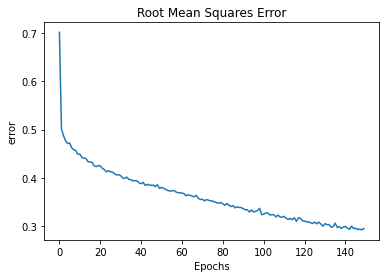

In [19]:
plt.plot(hist.history['root_mean_squared_error'])
#plt.plot(hist.history['val_root_mean_squared_error'])
plt.title('Root Mean Squares Error')
plt.xlabel('Epochs')
plt.ylabel('error')
plt.show()

Grafik diatas menunjukkan bagaimana error training berkurang dengan epoch selama proses training.

In [20]:
spfnet.evaluate(X_train, y_train)

99/99 [==============================] - 0s 2ms/step - loss: 0.0831 - root_mean_squared_error: 0.2883


[0.08312387764453888, 0.2883121073246002]

Hasil nilai dari error training yaitu 0.2883 NSE.

# Model Selection
Tujuan model selection adalah untuk menemukan arsitektur jaringan dengan sifat generalisasi terbaik.

In [21]:
from sklearn.metrics import mean_squared_error

y_pred = spfnet.predict(X_test) # get model predictions (scaled inputs here)
y_pred_orig = sc_y.inverse_transform(y_pred) # unscale the predictions
y_test_orig = sc_y.inverse_transform(y_test) # unscale the true test outcomes

RMSE_orig = mean_squared_error(y_pred_orig, y_test_orig, squared=False)
RMSE_orig

461.0138049194166

Nilai akhirnya dari error training menggunakan rumus RMSE yaitu 461.01 NSE 

# Model Selection
Tujuan model selection adalah untuk menemukan arsitektur jaringan dengan sifat generalisasi terbaik.

In [22]:
train_pred = spfnet.predict(X_train) # get model predictions (scaled inputs here)
train_pred_orig = sc_y.inverse_transform(train_pred) # unscale the predictions
y_train_orig = sc_y.inverse_transform(y_train) # unscale the true train outcomes

mean_squared_error(train_pred_orig, y_train_orig, squared=False)

269.5669899647966

Seperti yang kita lihat, kesalahan pelatihan akhir terus berkurang dengan jumlah neuron. Namun, kesalahan pemilihan akhir mengambil nilai minimum di beberapa titik. Di sini, jumlah neuron yang optimal adalah 18, sesuai dengan kesalahan pemilihan 269.56 NSE.

In [23]:
from sklearn.metrics import r2_score
r2_score(y_pred_orig, y_test_orig)

0.7130575254054949

In [25]:
r2_score(train_pred_orig, y_train_orig)

0.8978977486959585

In [26]:
np.concatenate((train_pred_orig, y_train_orig), 1)

array([[1623.65368652, 1485.1517    ],
       [ 651.38720703,  238.13972   ],
       [1622.50671387, 1662.2218    ],
       ...,
       [2680.31079102, 2766.8408    ],
       [ 802.28125   ,  591.26963   ],
       [1364.17822266, 1004.3757    ]])

In [27]:
np.concatenate((y_pred_orig, y_test_orig), 1)

array([[2649.85400391, 2511.2375    ],
       [ 380.55996704,  480.20512   ],
       [2072.51367188, 2017.5687    ],
       ...,
       [ 809.70599365,  523.50056   ],
       [2562.03491211, 2506.2019    ],
       [1520.96069336,  484.93113   ]])

# Testing
Tujuan dari analisis testing adalah untuk memvalidasi kemampuan generalisasi neural network. Disini menggunakan contoh pengujian dalam kumpulan data, yang belum pernah digunakan sebelumnya.

Metode standard testing dalam aplikasi aproksimasi adalah dengan melakukan analisis linear regression antara nilai tingkat polutan yang diprediksi dan yang sebenarnya.

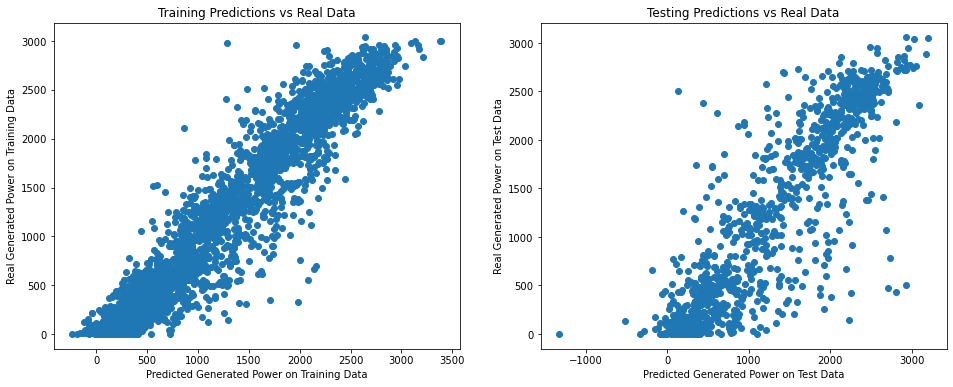

In [28]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,2)
plt.scatter(y_pred_orig, y_test_orig)
plt.xlabel('Predicted Generated Power on Test Data')
plt.ylabel('Real Generated Power on Test Data')
plt.title('Testing Predictions vs Real Data')
#plt.scatter(y_test_orig, sc_X.inverse_transform(X_test)[:,2], color='green')
plt.subplot(1,2,1)
plt.scatter(train_pred_orig, y_train_orig)
plt.xlabel('Predicted Generated Power on Training Data')
plt.ylabel('Real Generated Power on Training Data')
plt.title('Training Predictions vs Real Data')
plt.show()

Pada gambar diatas menampilkan plot pencar dari hasil training dan testing perkiraan dengan data asli yang diambil dari sumber data untuk mengetahui outlier yang dihasilkan dari kebenaran daya yang dihasilkan dengan perkiraan daya yang dihasilkan. 

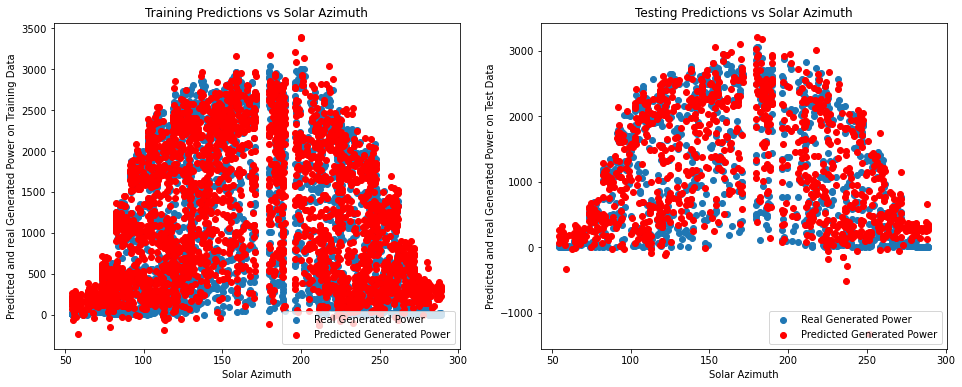

In [29]:
x_axis = sc_X.inverse_transform(X_train)[:,-1]
x2_axis = sc_X.inverse_transform(X_test)[:,-1]
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.scatter(x_axis, y_train_orig, label='Real Generated Power')
plt.scatter(x_axis, train_pred_orig, c='red', label='Predicted Generated Power')
plt.ylabel('Predicted and real Generated Power on Training Data')
plt.xlabel('Solar Azimuth')
plt.title('Training Predictions vs Solar Azimuth')
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.scatter(x2_axis, y_test_orig, label='Real Generated Power')
plt.scatter(x2_axis, y_pred_orig, c='red', label='Predicted Generated Power')
plt.ylabel('Predicted and real Generated Power on Test Data')
plt.xlabel('Solar Azimuth')
plt.title('Testing Predictions vs Solar Azimuth')
plt.legend(loc='lower right')
plt.show()

Plot pencar diatas menampilkan hasil dari training dan testing perkiraan dengan tenaga surya azimuth. Bisa dilihat warna biru untuk menandakan daya yang dihasilkan nyata oleh tenaga surya sedangkan warna merah untuk menandakan perkiraan daya yang dihasilkan oleh tenaga surya.

In [30]:
results = np.concatenate((y_test_orig, y_pred_orig), 1)
results = pd.DataFrame(data=results)
results.columns = ['Real Solar Power Produced', 'Predicted Solar Power']
#results = results.sort_values(by=['Real Solar Power Produced'])
pd.options.display.float_format = "{:,.2f}".format
#results[800:820]
results[7:18]

,Real Solar Power Produced,Predicted Solar Power
7,"2,497.53","2,258.69"
8,514.65,259.67
9,916.92,"1,215.38"
10,"1,911.95","1,926.07"
11,35.15,112.34
12,"2,449.04","2,354.34"
13,38.84,"1,209.59"
14,823.41,"1,952.96"
15,"2,274.65","2,318.80"
16,"1,123.40","1,126.59"


Tabel diatas merupakan hasil dari perbandingan data training dan testing untuk daya yang nyata dihasilkan oleh tenaga surya dengan perkiraan daya yang dihasilakan oleh tenaga surya.

In [31]:
sc = StandardScaler()
pred_whole = spfnet.predict(sc.fit_transform(X))
pred_whole_orig = sc_y.inverse_transform(pred_whole)
pred_whole_orig

array([[ 445.1688 ],
       [1261.4072 ],
       [2013.1814 ],
       ...,
       [ 358.3469 ],
       [-105.01884],
       [ 366.22678]], dtype=float32)

In [32]:
y

array([[ 454.10095 ],
       [1411.9994  ],
       [2214.8493  ],
       ...,
       [ 158.36778 ],
       [ 126.95306 ],
       [  20.055031]])

In [33]:
r2_score(pred_whole_orig, y)

0.8495205887249395

Untuk kecocokan yang sempurna, koefisien korelasi R2 akan menjadi 1. Karena kita memiliki R2 = 0.849, neural network memprediksi data testing dengan cukup baik.

In [34]:
df_results = pd.DataFrame.from_dict({
    'R2 Score of Whole Data Frame': r2_score(pred_whole_orig, y),
    'R2 Score of Training Set': r2_score(train_pred_orig, y_train_orig),
    'R2 Score of Test Set': r2_score(y_pred_orig, y_test_orig),
    'Mean of Test Set': np.mean(y_pred_orig),
    'Standard Deviation pf Test Set': np.std(y_pred_orig),
    'Relative Standard Deviation': np.std(y_pred_orig) / np.mean(y_pred_orig),
},orient='index', columns=['Value'])
display(df_results.style.background_gradient(cmap='afmhot', axis=0))

,Value
R2 Score of Whole Data Frame,0.849521
R2 Score of Training Set,0.897898
R2 Score of Test Set,0.713058
Mean of Test Set,1189.213501
Standard Deviation pf Test Set,860.630066
Relative Standard Deviation,0.723697


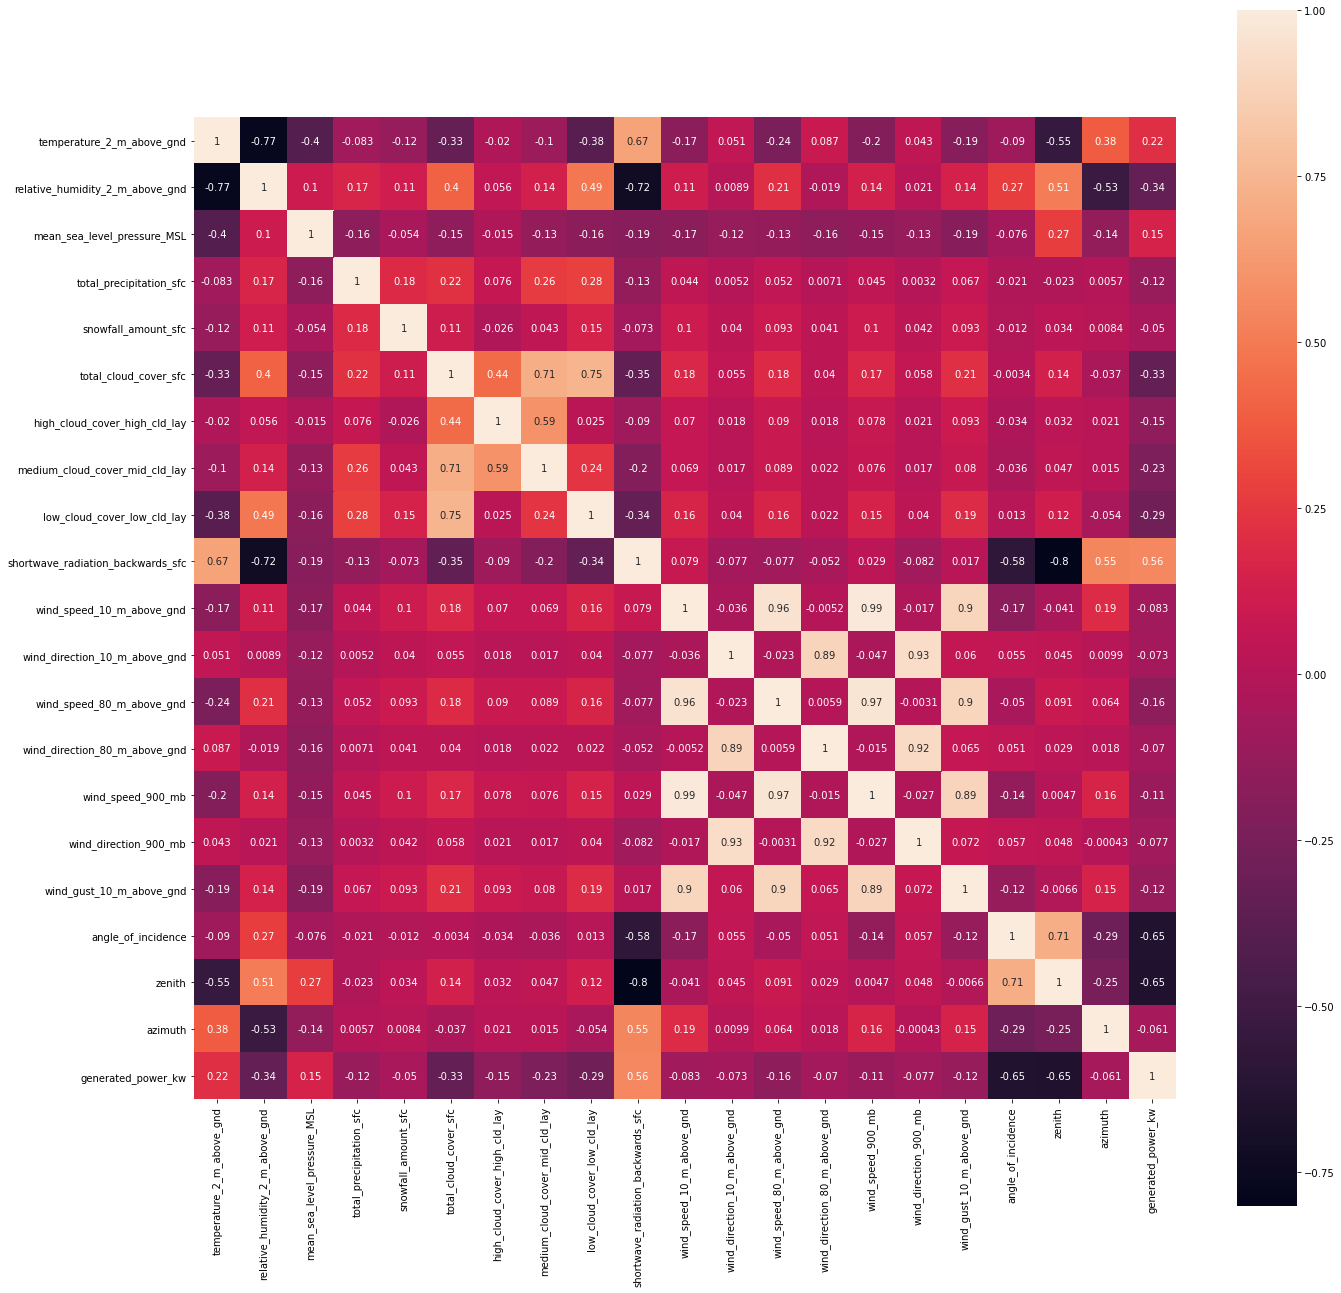

In [35]:
corr = dts.corr()
plt.figure(figsize=(22,22))
sns.heatmap(corr, annot=True, square=True);

# Observasi

•	Korelasi Tinggi antara Zenith dan Agnle of Incident sebesar 0.71

•	Radiasi gelombang pendek mundur dan Menghasilkan Daya KW memiliki corr 0,56

•	Kelembaban Relatif dan Zenith adalah +ve corr (0,51)

•	Kelembaban Relatif dan Tutupan Awan Rendah berkorelasi + ve (0,49)

•	Angle of Incident dan Zenith sangat berkorelasi dengan Genarted Power (-0.65)

•	-ve corr antara Zenith dan suhu -0,55

•	Koreksi negatif tinggi ada btw radiasi gelombang pendek mundur dan Zenith (-0.8)

•	Radiasi gelombang pendek mundur dan kelembaban relatif berkorelasi sangat tinggi (-0,72)

•	Kelembaban relatif dan Suhu sangat berkorelasi (-0,77)

# Penerapan Model

Dalam fase penyebaran model, jaringan saraf digunakan untuk memprediksi output untuk input yang belum pernah dilihatnya.
Kita dapat menghitung output jaringan saraf untuk satu set input yang diberikan:

In [36]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 0.001)

lasso.fit(X_train, y_train)

y_pred_lasso = lasso.predict(X_test)

lasso_coeff = pd.DataFrame({'Feature Importance':lasso.coef_}, index=dts.columns[:-1])
lasso_coeff.sort_values('Feature Importance', ascending=False)

,Feature Importance
shortwave_radiation_backwards_sfc,0.38
mean_sea_level_pressure_MSL,0.12
wind_speed_80_m_above_gnd,0.07
wind_speed_10_m_above_gnd,0.02
snowfall_amount_sfc,0.02
wind_direction_80_m_above_gnd,0.01
wind_direction_10_m_above_gnd,0.01
wind_direction_900_mb,-0.00
total_precipitation_sfc,-0.00
wind_gust_10_m_above_gnd,-0.03


Disini kita bisa melihat bagaimana jarak ke matahari siang mempengaruhi daya yang dihasilkan:

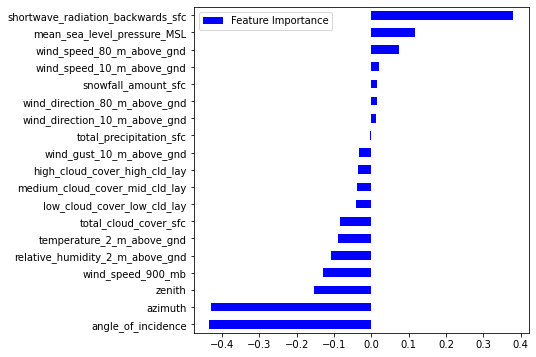

In [37]:
g = lasso_coeff[lasso_coeff['Feature Importance']!=0].sort_values('Feature Importance').plot(kind='barh',figsize=(6,6), cmap='winter')

    Nama  : Amailia

    NIM   : 09011281924057

    Kelas : SK 5 B Indralaya

    Project Artificial Intelligence